In [605]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings("ignore")

In [606]:
my_dataset = pd.read_csv('My_Dataset_для_С2.txt', sep=',')
my_dataset

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanSysABP,MeanTemp,MeanTroponinI,MeanTropI,MeanTroponinT,MeanTropT,MeanUrine,MeanWBC,MeanWeight,Unnamed: 44
0,66269.5,27.0,0.0,-0.50,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,37.357143,NaN,NaN,NaN,NaN,171.052632,10.300000,-1.000000,NaN
1,66270.0,38.0,0.5,87.65,1.0,NaN,NaN,NaN,NaN,NaN,...,113.411765,36.939130,NaN,NaN,NaN,NaN,151.560976,11.266667,80.670588,NaN
2,66270.5,22.0,0.0,-0.50,1.5,2.5,116.0,83.0,199.5,2.9,...,125.687500,37.800000,NaN,NaN,NaN,NaN,124.951220,4.700000,56.700000,NaN
3,66271.5,34.0,0.5,90.15,1.5,4.4,105.0,12.0,15.0,0.2,...,NaN,36.223077,NaN,NaN,NaN,NaN,545.833333,9.400000,84.600000,NaN
4,66272.5,44.0,0.0,-0.50,1.5,3.3,NaN,NaN,NaN,NaN,...,NaN,36.880000,NaN,NaN,NaN,NaN,62.131579,4.300000,-1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,76424.5,39.0,0.5,90.15,1.0,NaN,NaN,NaN,NaN,NaN,...,129.271186,36.854348,NaN,NaN,NaN,NaN,129.487805,16.766667,88.184444,NaN
7996,76425.5,45.0,0.5,88.90,1.5,NaN,74.0,12.0,25.0,1.0,...,117.416667,37.092857,NaN,NaN,0.142,NaN,20.333333,28.071429,87.096000,NaN
7997,76429.0,35.0,0.0,76.20,1.0,2.8,88.0,11.0,21.0,NaN,...,120.272727,36.600000,1.0,NaN,NaN,NaN,135.926829,14.333333,78.090566,NaN
7998,76431.0,24.5,0.0,-0.50,1.5,NaN,NaN,NaN,NaN,NaN,...,NaN,36.409091,NaN,NaN,NaN,NaN,324.444444,15.100000,57.000000,NaN


In [607]:
my_dataset.describe()

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanSysABP,MeanTemp,MeanTroponinI,MeanTropI,MeanTroponinT,MeanTropT,MeanUrine,MeanWBC,MeanWeight,Unnamed: 44
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,3246.000000,3379.000000,3456.000000,3461.000000,3446.000000,...,5610.000000,7871.000000,385.000000,1.0,1805.000000,0.0,7787.000000,7861.000000,8000.000000,0.0
mean,71336.304188,32.214875,0.280687,44.059112,1.391875,2.951625,105.159711,161.229856,228.553798,1.885847,...,119.096129,36.956918,7.600771,1.3,1.017012,NaN,134.054444,12.797013,76.614612,NaN
std,2928.526287,8.676314,0.249131,43.102086,0.506548,0.633583,105.184140,584.978187,821.954211,4.275192,...,19.981561,0.709756,10.302880,NaN,2.557133,NaN,110.105727,21.442040,32.504830,NaN
min,66269.500000,7.500000,-0.500000,-0.500000,0.500000,1.100000,12.000000,3.000000,6.000000,0.000000,...,0.000000,21.644615,0.300000,1.3,0.010000,NaN,0.000000,0.075000,-1.000000,NaN
25%,68796.375000,26.500000,0.000000,-0.500000,1.000000,2.500000,57.500000,18.000000,25.000000,0.400000,...,107.020303,36.600000,0.800000,1.3,0.040000,NaN,74.355163,8.750000,63.400000,NaN
50%,71337.000000,33.500000,0.500000,76.200000,1.500000,2.933333,78.000000,31.000000,46.000000,0.700000,...,117.116201,36.970000,2.200000,1.3,0.130000,NaN,112.500000,11.500000,78.000000,NaN
75%,73868.750000,39.000000,0.500000,85.100000,2.000000,3.400000,111.000000,71.500000,104.500000,1.400000,...,130.528846,37.360000,11.300000,1.3,0.652500,NaN,163.080952,14.950000,92.829021,NaN
max,76432.000000,45.000000,0.500000,231.150000,2.000000,5.300000,1472.333333,10728.888889,15680.000000,55.500000,...,199.000000,39.748980,49.200000,1.3,24.040000,NaN,3082.380952,1791.542857,472.000000,NaN


### Устранение дубликатов, пустых записей

Удалим пустые столбцы

In [608]:
my_dataset = my_dataset.dropna(axis=1, how='all')
my_dataset

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanRespRate,MeanSaO2,MeanSysABP,MeanTemp,MeanTroponinI,MeanTropI,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight
0,66269.5,27.0,0.0,-0.50,2.0,NaN,NaN,NaN,NaN,NaN,...,17.428571,NaN,NaN,37.357143,NaN,NaN,NaN,171.052632,10.300000,-1.000000
1,66270.0,38.0,0.5,87.65,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,96.833333,113.411765,36.939130,NaN,NaN,NaN,151.560976,11.266667,80.670588
2,66270.5,22.0,0.0,-0.50,1.5,2.5,116.0,83.0,199.5,2.9,...,NaN,95.000000,125.687500,37.800000,NaN,NaN,NaN,124.951220,4.700000,56.700000
3,66271.5,34.0,0.5,90.15,1.5,4.4,105.0,12.0,15.0,0.2,...,15.457627,NaN,NaN,36.223077,NaN,NaN,NaN,545.833333,9.400000,84.600000
4,66272.5,44.0,0.0,-0.50,1.5,3.3,NaN,NaN,NaN,NaN,...,19.166667,NaN,NaN,36.880000,NaN,NaN,NaN,62.131579,4.300000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,76424.5,39.0,0.5,90.15,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,96.875000,129.271186,36.854348,NaN,NaN,NaN,129.487805,16.766667,88.184444
7996,76425.5,45.0,0.5,88.90,1.5,NaN,74.0,12.0,25.0,1.0,...,NaN,94.333333,117.416667,37.092857,NaN,NaN,0.142,20.333333,28.071429,87.096000
7997,76429.0,35.0,0.0,76.20,1.0,2.8,88.0,11.0,21.0,NaN,...,16.115385,98.000000,120.272727,36.600000,1.0,NaN,NaN,135.926829,14.333333,78.090566
7998,76431.0,24.5,0.0,-0.50,1.5,NaN,NaN,NaN,NaN,NaN,...,NaN,67.000000,NaN,36.409091,NaN,NaN,NaN,324.444444,15.100000,57.000000


Проверим на наличие дубликатов

In [609]:
my_dataset[my_dataset.duplicated(keep=False)]

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanRespRate,MeanSaO2,MeanSysABP,MeanTemp,MeanTroponinI,MeanTropI,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight


### Обработка пропущенных значений, выбросов

In [610]:
x = my_dataset['MeanMechVent']
x

0       NaN
1       1.0
2       1.0
3       NaN
4       NaN
       ... 
7995    1.0
7996    1.0
7997    NaN
7998    NaN
7999    1.0
Name: MeanMechVent, Length: 8000, dtype: float64

In [611]:
set(x[x.isna() == False])

{1.0}

Столбец состоит только из NaN и 1. Его можно смело удалить

In [612]:
my_dataset = my_dataset.drop('MeanMechVent', axis=1)
my_dataset

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanRespRate,MeanSaO2,MeanSysABP,MeanTemp,MeanTroponinI,MeanTropI,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight
0,66269.5,27.0,0.0,-0.50,2.0,NaN,NaN,NaN,NaN,NaN,...,17.428571,NaN,NaN,37.357143,NaN,NaN,NaN,171.052632,10.300000,-1.000000
1,66270.0,38.0,0.5,87.65,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,96.833333,113.411765,36.939130,NaN,NaN,NaN,151.560976,11.266667,80.670588
2,66270.5,22.0,0.0,-0.50,1.5,2.5,116.0,83.0,199.5,2.9,...,NaN,95.000000,125.687500,37.800000,NaN,NaN,NaN,124.951220,4.700000,56.700000
3,66271.5,34.0,0.5,90.15,1.5,4.4,105.0,12.0,15.0,0.2,...,15.457627,NaN,NaN,36.223077,NaN,NaN,NaN,545.833333,9.400000,84.600000
4,66272.5,44.0,0.0,-0.50,1.5,3.3,NaN,NaN,NaN,NaN,...,19.166667,NaN,NaN,36.880000,NaN,NaN,NaN,62.131579,4.300000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,76424.5,39.0,0.5,90.15,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,96.875000,129.271186,36.854348,NaN,NaN,NaN,129.487805,16.766667,88.184444
7996,76425.5,45.0,0.5,88.90,1.5,NaN,74.0,12.0,25.0,1.0,...,NaN,94.333333,117.416667,37.092857,NaN,NaN,0.142,20.333333,28.071429,87.096000
7997,76429.0,35.0,0.0,76.20,1.0,2.8,88.0,11.0,21.0,NaN,...,16.115385,98.000000,120.272727,36.600000,1.0,NaN,NaN,135.926829,14.333333,78.090566
7998,76431.0,24.5,0.0,-0.50,1.5,NaN,NaN,NaN,NaN,NaN,...,NaN,67.000000,NaN,36.409091,NaN,NaN,NaN,324.444444,15.100000,57.000000


In [613]:
my_dataset['Gender'].value_counts()

 0.5    4499
 0.0    3493
-0.5       8
Name: Gender, dtype: int64

Заменим -0.5 и 0 в значении поля `Gender` на 0, а 0.5 на 1

In [614]:
my_dataset.loc[my_dataset['Gender'] <= 0, 'Gender'] = 0

In [615]:
my_dataset.loc[my_dataset['Gender'] > 0, 'Gender'] = 1

Заменим отрицательные значения веса и роста на среднее значение

In [616]:
my_dataset.loc[my_dataset['Height'] < 0, 'Height'] = my_dataset.mean()['Height']

In [617]:
my_dataset.loc[my_dataset['MeanWeight'] < 0, 'MeanWeight'] = my_dataset.mean()['MeanWeight']

In [618]:
my_dataset['ICUType'].value_counts()

1.5    2917
2.0    2260
1.0    1656
0.5    1167
Name: ICUType, dtype: int64

Вернем значения к оригинальным и используем one hot encoder, т.к. эта переменная категориальная

In [619]:
my_dataset['ICUType'] = 2 * my_dataset['ICUType']

In [620]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(my_dataset[['ICUType']]).toarray())
my_dataset = my_dataset.join(encoder_df)

my_dataset = my_dataset.drop('ICUType', axis=1)
my_dataset.rename(columns = {
    0: "Coronary Care Unit",
    1: "Cardiac Surgery Recovery Unit",
    2: "Medical ICU",
    3: "Surgical ICU"
}, inplace=True)

In [621]:
my_dataset

,RecordID,Age,Gender,Height,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,MeanBUN,...,MeanTroponinI,MeanTropI,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight,Coronary Care Unit,Cardiac Surgery Recovery Unit,Medical ICU,Surgical ICU
0,66269.5,27.0,0.0,44.059112,NaN,NaN,NaN,NaN,NaN,10.500000,...,NaN,NaN,NaN,171.052632,10.300000,76.614612,0.0,0.0,0.0,1.0
1,66270.0,38.0,1.0,87.650000,NaN,NaN,NaN,NaN,NaN,18.333333,...,NaN,NaN,NaN,151.560976,11.266667,80.670588,0.0,1.0,0.0,0.0
2,66270.5,22.0,0.0,44.059112,2.5,116.0,83.0,199.5,2.9,4.666667,...,NaN,NaN,NaN,124.951220,4.700000,56.700000,0.0,0.0,1.0,0.0
3,66271.5,34.0,1.0,90.150000,4.4,105.0,12.0,15.0,0.2,17.666667,...,NaN,NaN,NaN,545.833333,9.400000,84.600000,0.0,0.0,1.0,0.0
4,66272.5,44.0,0.0,44.059112,3.3,NaN,NaN,NaN,NaN,35.000000,...,NaN,NaN,NaN,62.131579,4.300000,76.614612,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,76424.5,39.0,1.0,90.150000,NaN,NaN,NaN,NaN,NaN,24.000000,...,NaN,NaN,NaN,129.487805,16.766667,88.184444,0.0,1.0,0.0,0.0
7996,76425.5,45.0,1.0,88.900000,NaN,74.0,12.0,25.0,1.0,54.571429,...,NaN,NaN,0.142,20.333333,28.071429,87.096000,0.0,0.0,1.0,0.0
7997,76429.0,35.0,0.0,76.200000,2.8,88.0,11.0,21.0,NaN,29.666667,...,1.0,NaN,NaN,135.926829,14.333333,78.090566,0.0,1.0,0.0,0.0
7998,76431.0,24.5,0.0,44.059112,NaN,NaN,NaN,NaN,NaN,14.000000,...,NaN,NaN,NaN,324.444444,15.100000,57.000000,0.0,0.0,1.0,0.0


Удалим столбцы, в которых пропусков больше чем половина

In [622]:
columns_to_drop = my_dataset.isna().sum()
columns_to_drop = columns_to_drop[columns_to_drop > 4000].keys()
columns_to_drop

Index(['MeanAlbumin', 'MeanALP', 'MeanALT', 'MeanAST', 'MeanBilirubin',
       'MeanCholesterol', 'MeanRespRate', 'MeanSaO2', 'MeanTroponinI',
       'MeanTropI', 'MeanTroponinT'],
      dtype='object')

In [623]:
my_dataset = my_dataset.drop(columns_to_drop, axis=1)
my_dataset

,RecordID,Age,Gender,Height,MeanBUN,MeanCreatinine,MeanDiasABP,MeanFiO2,MeanGCS,MeanGlucose,...,MeanPlatelets,MeanSysABP,MeanTemp,MeanUrine,MeanWBC,MeanWeight,Coronary Care Unit,Cardiac Surgery Recovery Unit,Medical ICU,Surgical ICU
0,66269.5,27.0,0.0,44.059112,10.500000,0.750000,NaN,NaN,14.923077,160.000000,...,203.000000,NaN,37.357143,171.052632,10.300000,76.614612,0.0,0.0,0.0,1.0
1,66270.0,38.0,1.0,87.650000,18.333333,1.100000,58.897059,0.560000,13.333333,125.500000,...,178.600000,113.411765,36.939130,151.560976,11.266667,80.670588,0.0,1.0,0.0,0.0
2,66270.5,22.0,0.0,44.059112,4.666667,0.333333,67.125000,0.500000,5.923077,134.333333,...,89.666667,125.687500,37.800000,124.951220,4.700000,56.700000,0.0,0.0,1.0,0.0
3,66271.5,34.0,1.0,90.150000,17.666667,0.766667,NaN,NaN,14.944444,117.333333,...,330.000000,NaN,36.223077,545.833333,9.400000,84.600000,0.0,0.0,1.0,0.0
4,66272.5,44.0,0.0,44.059112,35.000000,1.000000,NaN,NaN,15.000000,102.500000,...,103.000000,NaN,36.880000,62.131579,4.300000,76.614612,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,76424.5,39.0,1.0,90.150000,24.000000,1.000000,62.355932,0.686364,12.545455,110.000000,...,118.250000,129.271186,36.854348,129.487805,16.766667,88.184444,0.0,1.0,0.0,0.0
7996,76425.5,45.0,1.0,88.900000,54.571429,2.157143,45.375000,NaN,6.750000,141.714286,...,278.428571,117.416667,37.092857,20.333333,28.071429,87.096000,0.0,0.0,1.0,0.0
7997,76429.0,35.0,0.0,76.200000,29.666667,1.600000,60.863636,NaN,14.722222,121.333333,...,189.333333,120.272727,36.600000,135.926829,14.333333,78.090566,0.0,1.0,0.0,0.0
7998,76431.0,24.5,0.0,44.059112,14.000000,0.650000,NaN,NaN,15.000000,130.000000,...,194.500000,NaN,36.409091,324.444444,15.100000,57.000000,0.0,0.0,1.0,0.0


In [624]:
my_dataset.isna().sum()

RecordID                            0
Age                                 0
Gender                              0
Height                              0
MeanBUN                           120
MeanCreatinine                    120
MeanDiasABP                      2390
MeanFiO2                         2581
MeanGCS                           129
MeanGlucose                       201
MeanHCO3                          137
MeanHCT                           124
MeanHR                            128
MeanK                             169
MeanLactate                      3602
MeanMg                            186
MeanMAP                          2402
MeanNa                            138
MeanNIDiasABP                     999
MeanNIMAP                        1003
MeanNISysABP                      973
MeanPaCO2                        1965
MeanPAO2                         1966
MeanPH                           1929
MeanPlatelets                     130
MeanSysABP                       2390
MeanTemp    

Оставшиеся пропуски заполним средним значением по столбцу

In [625]:
my_dataset = my_dataset.fillna(my_dataset.mean())
my_dataset

,RecordID,Age,Gender,Height,MeanBUN,MeanCreatinine,MeanDiasABP,MeanFiO2,MeanGCS,MeanGlucose,...,MeanPlatelets,MeanSysABP,MeanTemp,MeanUrine,MeanWBC,MeanWeight,Coronary Care Unit,Cardiac Surgery Recovery Unit,Medical ICU,Surgical ICU
0,66269.5,27.0,0.0,44.059112,10.500000,0.750000,59.614996,0.551365,14.923077,160.000000,...,203.000000,119.096129,37.357143,171.052632,10.300000,76.614612,0.0,0.0,0.0,1.0
1,66270.0,38.0,1.0,87.650000,18.333333,1.100000,58.897059,0.560000,13.333333,125.500000,...,178.600000,113.411765,36.939130,151.560976,11.266667,80.670588,0.0,1.0,0.0,0.0
2,66270.5,22.0,0.0,44.059112,4.666667,0.333333,67.125000,0.500000,5.923077,134.333333,...,89.666667,125.687500,37.800000,124.951220,4.700000,56.700000,0.0,0.0,1.0,0.0
3,66271.5,34.0,1.0,90.150000,17.666667,0.766667,59.614996,0.551365,14.944444,117.333333,...,330.000000,119.096129,36.223077,545.833333,9.400000,84.600000,0.0,0.0,1.0,0.0
4,66272.5,44.0,0.0,44.059112,35.000000,1.000000,59.614996,0.551365,15.000000,102.500000,...,103.000000,119.096129,36.880000,62.131579,4.300000,76.614612,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,76424.5,39.0,1.0,90.150000,24.000000,1.000000,62.355932,0.686364,12.545455,110.000000,...,118.250000,129.271186,36.854348,129.487805,16.766667,88.184444,0.0,1.0,0.0,0.0
7996,76425.5,45.0,1.0,88.900000,54.571429,2.157143,45.375000,0.551365,6.750000,141.714286,...,278.428571,117.416667,37.092857,20.333333,28.071429,87.096000,0.0,0.0,1.0,0.0
7997,76429.0,35.0,0.0,76.200000,29.666667,1.600000,60.863636,0.551365,14.722222,121.333333,...,189.333333,120.272727,36.600000,135.926829,14.333333,78.090566,0.0,1.0,0.0,0.0
7998,76431.0,24.5,0.0,44.059112,14.000000,0.650000,59.614996,0.551365,15.000000,130.000000,...,194.500000,119.096129,36.409091,324.444444,15.100000,57.000000,0.0,0.0,1.0,0.0


### Обработка аномалий

Проанализируем гистограммы и удалим выбросы

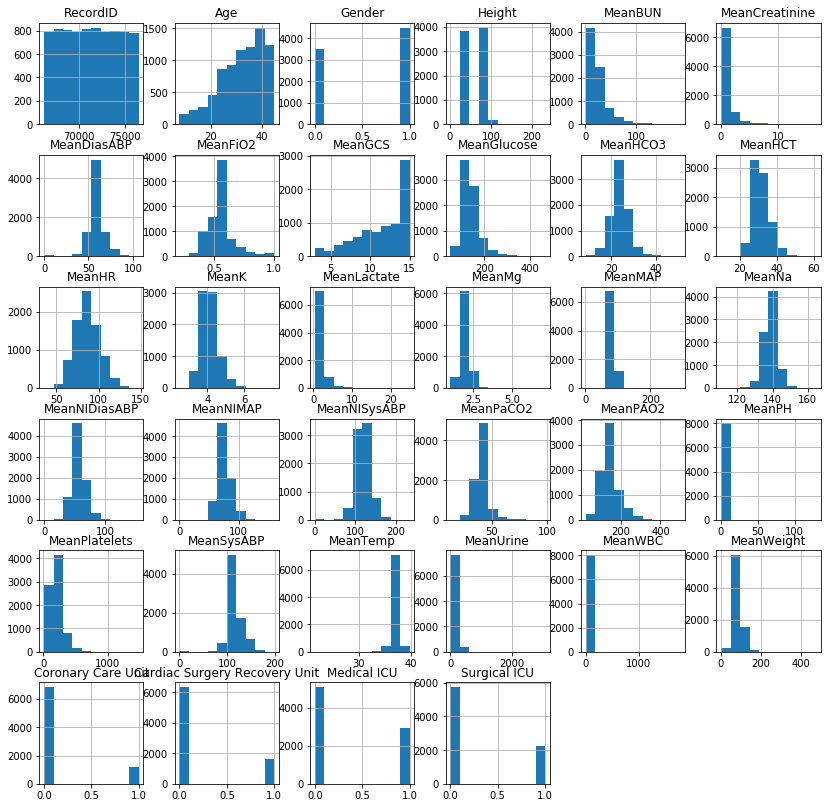

In [626]:
my_dataset.hist(figsize=(14, 14));

Применим для очистки от выбросов изоляционный лес

In [627]:
clf = IsolationForest(
    random_state=42,
    contamination=0.1
).fit(my_dataset)

my_dataset['anomaly'] = pd.Series(clf.predict(my_dataset))

In [628]:
my_dataset

,RecordID,Age,Gender,Height,MeanBUN,MeanCreatinine,MeanDiasABP,MeanFiO2,MeanGCS,MeanGlucose,...,MeanSysABP,MeanTemp,MeanUrine,MeanWBC,MeanWeight,Coronary Care Unit,Cardiac Surgery Recovery Unit,Medical ICU,Surgical ICU,anomaly
0,66269.5,27.0,0.0,44.059112,10.500000,0.750000,59.614996,0.551365,14.923077,160.000000,...,119.096129,37.357143,171.052632,10.300000,76.614612,0.0,0.0,0.0,1.0,1
1,66270.0,38.0,1.0,87.650000,18.333333,1.100000,58.897059,0.560000,13.333333,125.500000,...,113.411765,36.939130,151.560976,11.266667,80.670588,0.0,1.0,0.0,0.0,1
2,66270.5,22.0,0.0,44.059112,4.666667,0.333333,67.125000,0.500000,5.923077,134.333333,...,125.687500,37.800000,124.951220,4.700000,56.700000,0.0,0.0,1.0,0.0,1
3,66271.5,34.0,1.0,90.150000,17.666667,0.766667,59.614996,0.551365,14.944444,117.333333,...,119.096129,36.223077,545.833333,9.400000,84.600000,0.0,0.0,1.0,0.0,1
4,66272.5,44.0,0.0,44.059112,35.000000,1.000000,59.614996,0.551365,15.000000,102.500000,...,119.096129,36.880000,62.131579,4.300000,76.614612,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,76424.5,39.0,1.0,90.150000,24.000000,1.000000,62.355932,0.686364,12.545455,110.000000,...,129.271186,36.854348,129.487805,16.766667,88.184444,0.0,1.0,0.0,0.0,1
7996,76425.5,45.0,1.0,88.900000,54.571429,2.157143,45.375000,0.551365,6.750000,141.714286,...,117.416667,37.092857,20.333333,28.071429,87.096000,0.0,0.0,1.0,0.0,1
7997,76429.0,35.0,0.0,76.200000,29.666667,1.600000,60.863636,0.551365,14.722222,121.333333,...,120.272727,36.600000,135.926829,14.333333,78.090566,0.0,1.0,0.0,0.0,1
7998,76431.0,24.5,0.0,44.059112,14.000000,0.650000,59.614996,0.551365,15.000000,130.000000,...,119.096129,36.409091,324.444444,15.100000,57.000000,0.0,0.0,1.0,0.0,1


In [629]:
my_dataset = my_dataset.drop(my_dataset[my_dataset.anomaly == -1].index)
my_dataset = my_dataset.drop('anomaly', axis=1)

In [630]:
my_dataset

,RecordID,Age,Gender,Height,MeanBUN,MeanCreatinine,MeanDiasABP,MeanFiO2,MeanGCS,MeanGlucose,...,MeanPlatelets,MeanSysABP,MeanTemp,MeanUrine,MeanWBC,MeanWeight,Coronary Care Unit,Cardiac Surgery Recovery Unit,Medical ICU,Surgical ICU
0,66269.5,27.0,0.0,44.059112,10.500000,0.750000,59.614996,0.551365,14.923077,160.000000,...,203.000000,119.096129,37.357143,171.052632,10.300000,76.614612,0.0,0.0,0.0,1.0
1,66270.0,38.0,1.0,87.650000,18.333333,1.100000,58.897059,0.560000,13.333333,125.500000,...,178.600000,113.411765,36.939130,151.560976,11.266667,80.670588,0.0,1.0,0.0,0.0
2,66270.5,22.0,0.0,44.059112,4.666667,0.333333,67.125000,0.500000,5.923077,134.333333,...,89.666667,125.687500,37.800000,124.951220,4.700000,56.700000,0.0,0.0,1.0,0.0
3,66271.5,34.0,1.0,90.150000,17.666667,0.766667,59.614996,0.551365,14.944444,117.333333,...,330.000000,119.096129,36.223077,545.833333,9.400000,84.600000,0.0,0.0,1.0,0.0
4,66272.5,44.0,0.0,44.059112,35.000000,1.000000,59.614996,0.551365,15.000000,102.500000,...,103.000000,119.096129,36.880000,62.131579,4.300000,76.614612,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,76424.5,39.0,1.0,90.150000,24.000000,1.000000,62.355932,0.686364,12.545455,110.000000,...,118.250000,129.271186,36.854348,129.487805,16.766667,88.184444,0.0,1.0,0.0,0.0
7996,76425.5,45.0,1.0,88.900000,54.571429,2.157143,45.375000,0.551365,6.750000,141.714286,...,278.428571,117.416667,37.092857,20.333333,28.071429,87.096000,0.0,0.0,1.0,0.0
7997,76429.0,35.0,0.0,76.200000,29.666667,1.600000,60.863636,0.551365,14.722222,121.333333,...,189.333333,120.272727,36.600000,135.926829,14.333333,78.090566,0.0,1.0,0.0,0.0
7998,76431.0,24.5,0.0,44.059112,14.000000,0.650000,59.614996,0.551365,15.000000,130.000000,...,194.500000,119.096129,36.409091,324.444444,15.100000,57.000000,0.0,0.0,1.0,0.0


### Получение описательных статистик и графиков распределения всех признаков из итогового набора полей

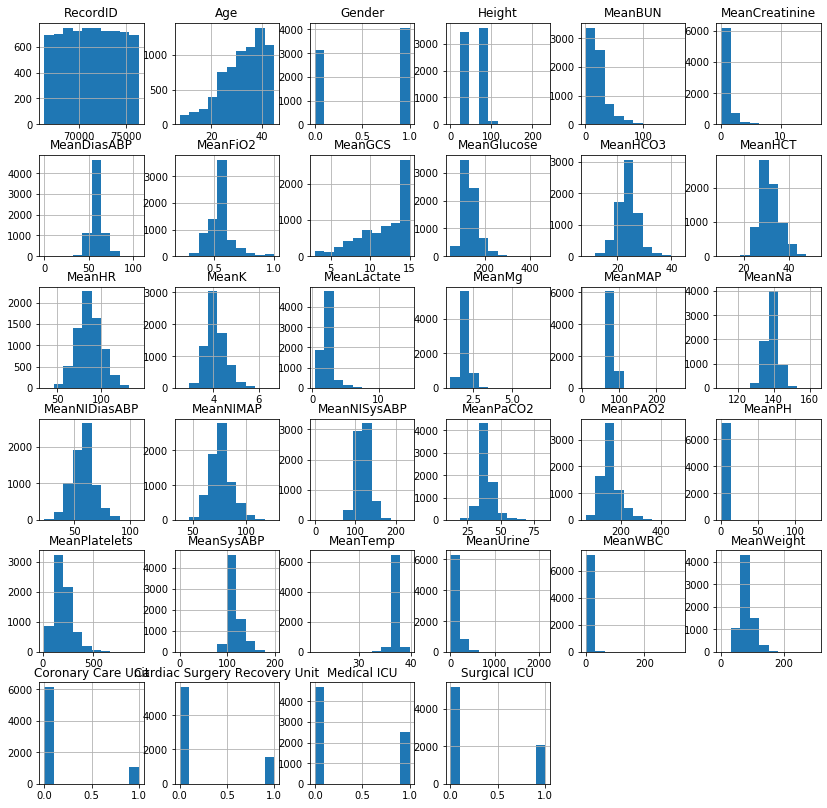

In [631]:
my_dataset.hist(figsize=(14, 14));

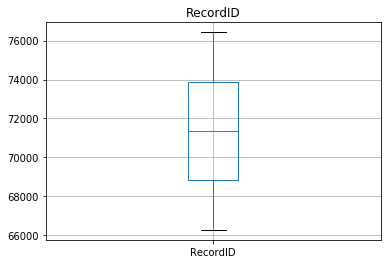

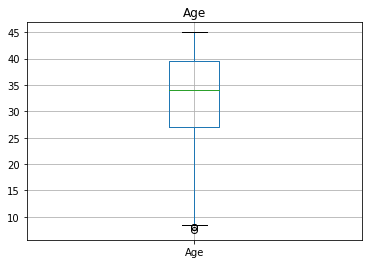

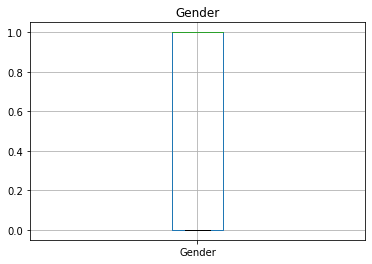

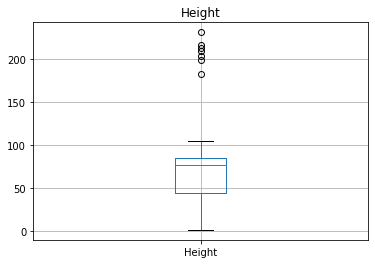

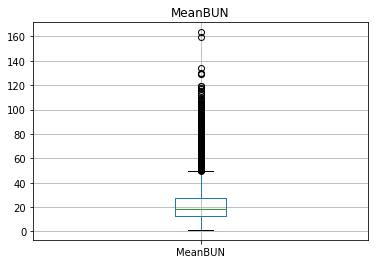

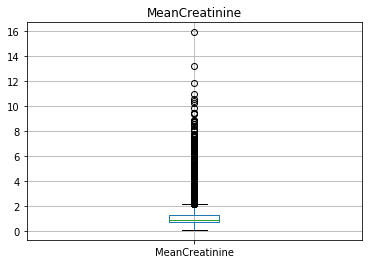

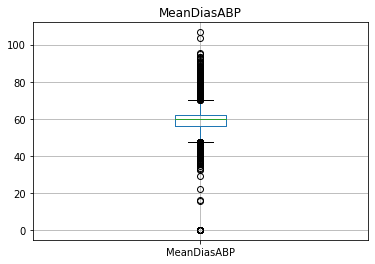

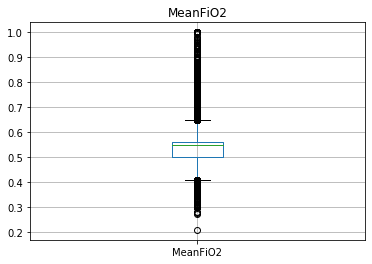

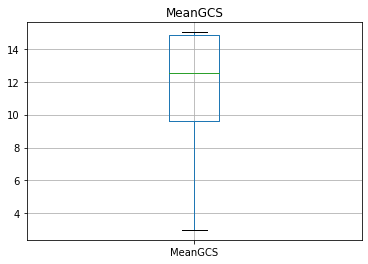

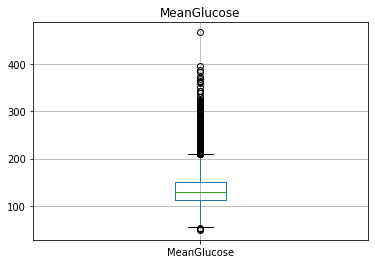

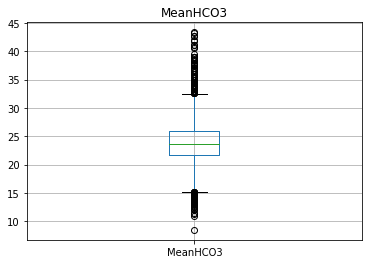

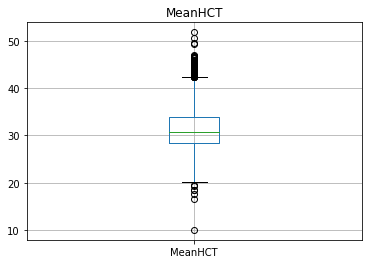

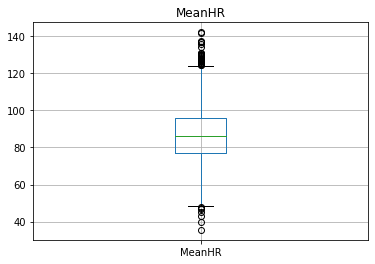

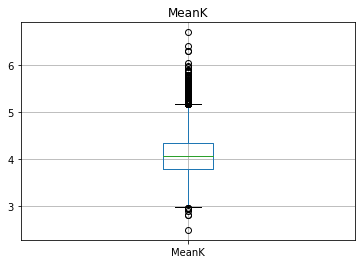

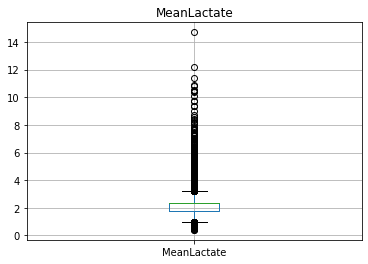

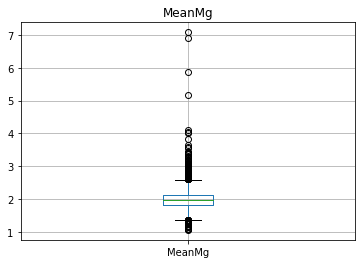

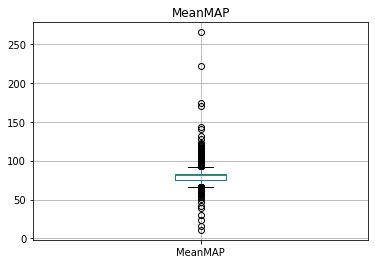

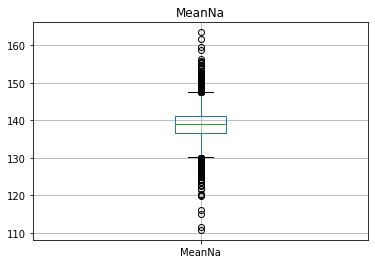

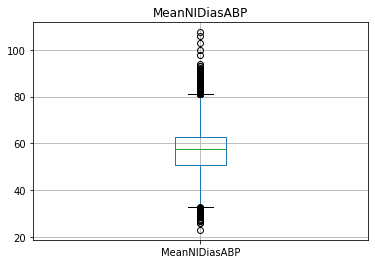

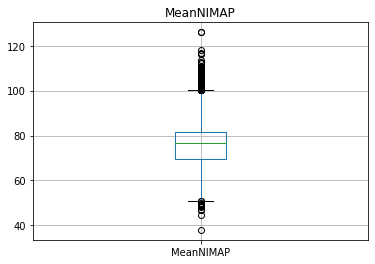

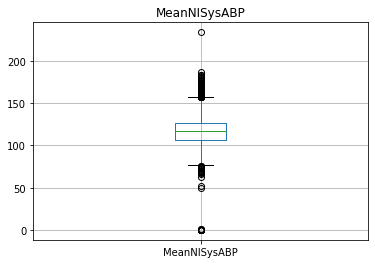

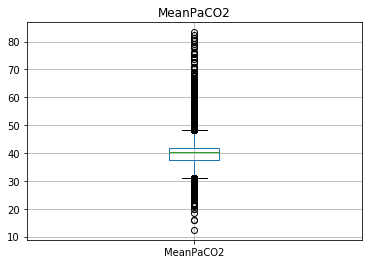

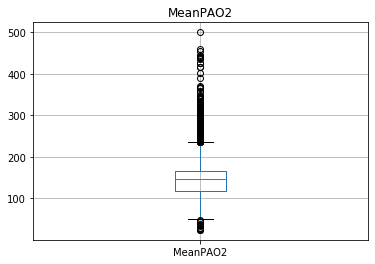

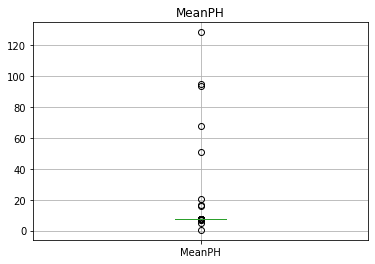

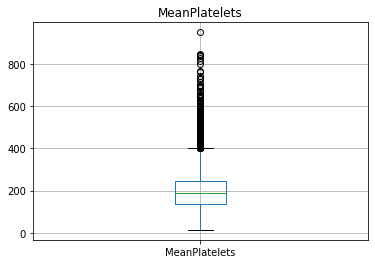

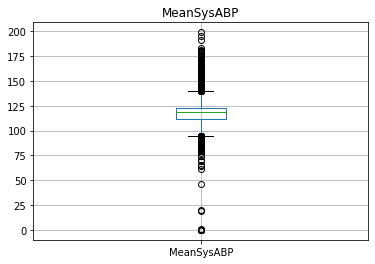

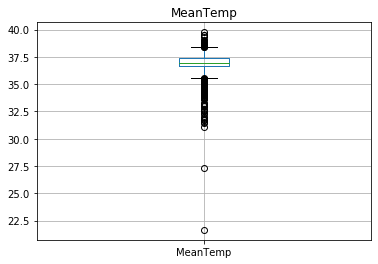

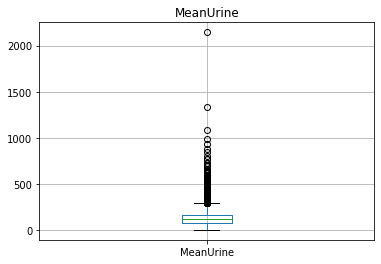

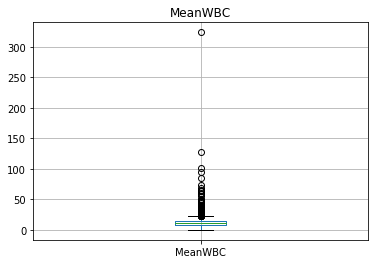

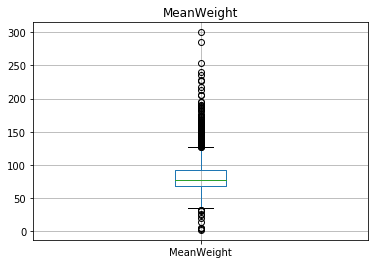

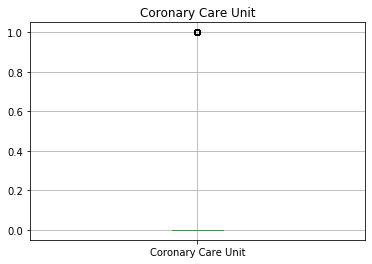

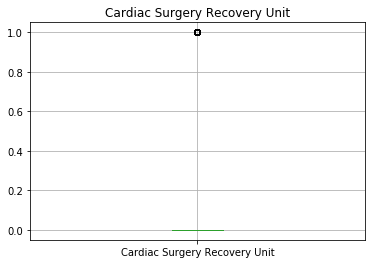

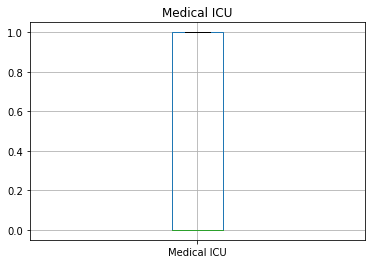

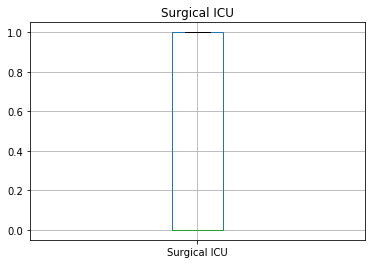

In [632]:
for column in my_dataset.columns:
    my_dataset.boxplot(column=column)
    plt.title(column)
    plt.show()

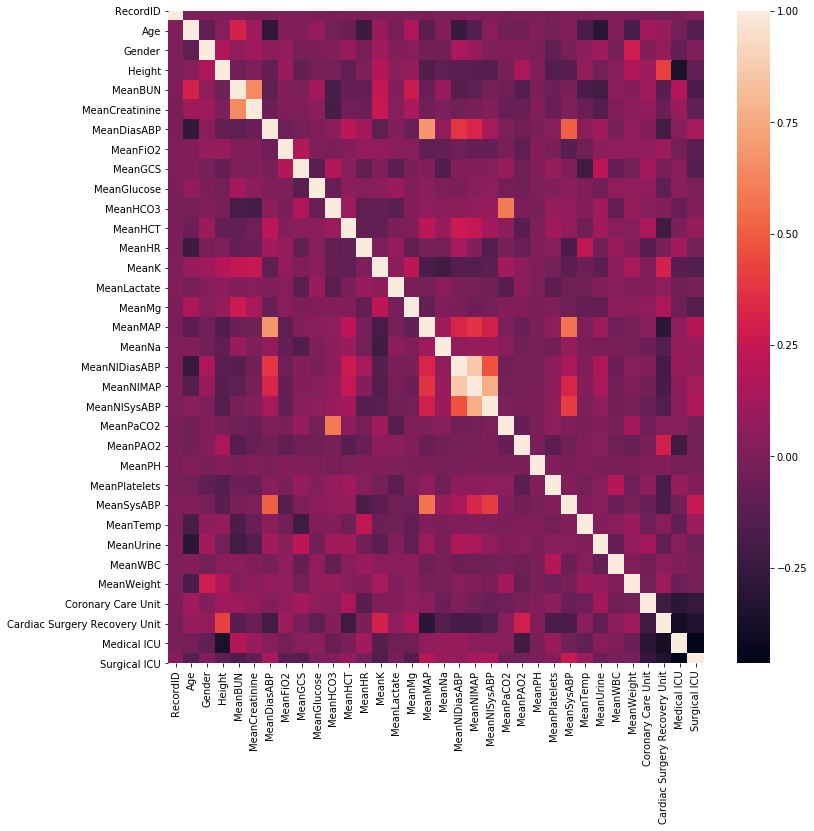

In [633]:
plt.figure(figsize=(12, 12))
sn.heatmap(my_dataset.corr())

Заметна высокая корреляция признаков `MeanNIMAP` с `MeanNiDiasABP` и `MeanNIMAP` с `MeanNiSysABP`. По хорошему стоит удалить в каждой паре хотя бы один из них, но можно в дальнейшем использовать модели, которые борятся с корреляцией признаков

In [634]:
my_dataset.describe()

,RecordID,Age,Gender,Height,MeanBUN,MeanCreatinine,MeanDiasABP,MeanFiO2,MeanGCS,MeanGlucose,...,MeanPlatelets,MeanSysABP,MeanTemp,MeanUrine,MeanWBC,MeanWeight,Coronary Care Unit,Cardiac Surgery Recovery Unit,Medical ICU,Surgical ICU
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,71348.294236,32.491389,0.565972,65.433030,23.052937,1.179589,59.520326,0.547602,11.799718,136.164884,...,201.593196,119.073360,36.970289,135.835846,12.317990,81.795640,0.146250,0.217778,0.349306,0.286667
std,2907.939471,8.559694,0.495663,21.317764,16.367497,0.988301,7.695569,0.100513,3.105624,37.167882,...,95.820008,14.690928,0.674362,95.481804,6.973732,21.627481,0.353381,0.412764,0.476784,0.452236
min,66269.500000,7.500000,0.000000,0.900000,1.285714,0.100000,0.000000,0.210000,3.000000,49.000000,...,13.666667,0.000000,21.644615,0.000000,0.075000,1.782222,0.000000,0.000000,0.000000,0.000000
25%,68856.125000,27.000000,0.000000,44.059112,12.666667,0.700000,56.067597,0.500000,9.598810,112.000000,...,138.000000,111.726362,36.629643,79.020833,8.772917,68.324057,0.000000,0.000000,0.000000,0.000000
50%,71339.000000,34.000000,1.000000,76.200000,18.333333,0.900000,59.614996,0.551365,12.550505,130.000000,...,187.666667,119.096129,36.967443,116.585366,11.500000,77.700000,0.000000,0.000000,0.000000,0.000000
75%,73861.875000,39.500000,1.000000,85.100000,27.500000,1.286161,61.760524,0.560000,14.818182,151.000000,...,243.687500,123.157051,37.350000,162.692773,14.635000,92.000000,0.000000,0.000000,1.000000,1.000000
max,76432.000000,45.000000,1.000000,231.150000,163.333333,15.875000,106.666667,1.000000,15.000000,467.333333,...,950.750000,199.000000,39.748980,2145.000000,323.710000,300.000000,1.000000,1.000000,1.000000,1.000000


In [635]:
my_dataset.to_csv('data.csv')